In [101]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
import pandas as pd
from itertools import chain
import ast
import subprocess
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import rdFMCS
from IPython.display import display
import xml.etree.ElementTree as ET
import os
import subprocess
os.chdir('/Users/kate_fieseler/PycharmProjects/chemUtils') # Need to add this package to the path
import chemUtils
from chemUtils import *
from chemUtils.visualization.molPlot import draw_molecule_grid_with_captions
from utils.input import process_routes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of postera_base failed: Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'postera_base'
]
[autoreload of postera_base failed: Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/site-packages/IPython/extensi

In [102]:
# 1. Load the data, look, and convert to RDKit molecules. 6 molecules total.
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/D2R_green_21Aug.csv')
df
# Save csv of smiles
df['smiles'].to_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r/smiles.csv', index=False)

[autoreload of postera_base failed: Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/opt/homebrew/anaconda3/envs/pyrosetta/lib/python3.9/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'postera_base'
]


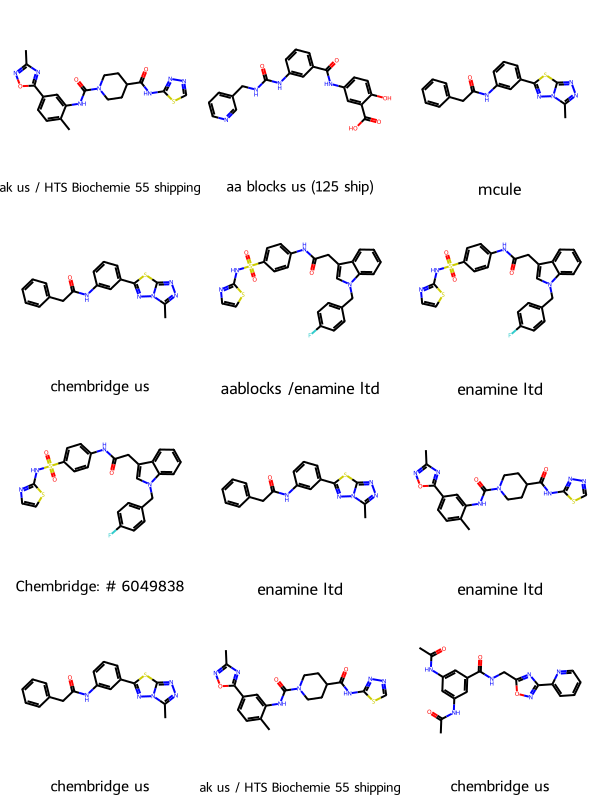

In [103]:
# 2. Visualize
draw_molecule_grid_with_captions(df['smiles'].tolist(), df['Company'].tolist())

In [104]:
# 3. Get reactants
# Use only diamond reactions = True
# Run through retrosynthesis Manifold
# search depth = 4
# catalogs = ["mcule_ultimate", "enamine_real", "wuxi_bb_screening", "sigma", "generic", "molport", "emolecules", "mcule", "wuxi_galaxi", "enamine_bb", "enamine_made"]
# cache_fname_tags='D2R_21Aug'
%run /Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/D2R_green_21Aug.csv 8

# Running from the notebook for some reason doesn't save in cache. But running from the terminal does save in cache.

100%|██████████| 12/12 [00:00<00:00, 1080.29it/s]


tmpdir: <TemporaryDirectory '/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpon927hfj'>
cache_working_name: /var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpon927hfj/cache_postera_%(computation_type_tag)s%(cache_fname_tags)s.sqlite
Number of entries in cache: 0
---PRE SEARCH---
lauching query 0 (https://api.postera.ai/api/v1/retrosynthesis/batch/)...
{'smilesList': ['Cc1noc(-c2ccc(C)c(NC(=O)N3CCC(C(=O)Nc4nncs4)CC3)c2)n1', 'O=C(NCc1cccnc1)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1', 'Cc1nnc2sc(-c3cccc(NC(=O)Cc4ccccc4)c3)nn12', 'Cc1nnc2sc(-c3cccc(NC(=O)Cc4ccccc4)c3)nn12', 'O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1', 'O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1', 'O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1', 'Cc1nnc2sc(-c3cccc(NC(=O)Cc4ccccc4)c3)nn12', 'Cc1noc(-c2ccc(C)c(NC(=O)N3CCC(C(=O)Nc4nncs4)CC3)c2)n1', 'Cc1nnc2sc(-c3cccc(NC(=O)Cc4ccccc4)c3)nn12'], 'maxSearchDepth': 4, 'catalogs': ['mcule_ultimate', 'generic', 'molport', 'mcul

In [105]:
# Get single step pathways
command = [
    "python",
    "/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py",
    "-t",
    "/Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_%(computation_type_tag)s%(cache_fname_tags)s.sqlite", # cache to look through
    "-r",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r", # results
    "-s",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r/smiles.csv", #smiles csv
    "-x", # retrosynthesis
    "-n", # number of steps looking for
    "1"
]
subprocess.run(command)
# No error code so all smiles were found

Cache path provided: /Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_%(computation_type_tag)s%(cache_fname_tags)s.sqlite
Results directory provided: /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r
---Performing retrosynthesis search---
Number of steps you are looking for: 1
Saving all routes with 1 step(s) to csv at smiles_routes_1_step.csv


CompletedProcess(args=['python', '/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py', '-t', '/Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_%(computation_type_tag)s%(cache_fname_tags)s.sqlite', '-r', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r', '-s', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r/smiles.csv', '-x', '-n', '1'], returncode=0)

In [106]:
# Look at all compounds and reactants in mol grid
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r/smiles_routes_1_step.csv')
df

,SMILES,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock
0,CC1=NOC(C2=CC=C(C)C(NC(=O)N3CCC(C(=O)NC4=NN=CS...,1,['Formation of urea from two amines'],"[('O=C(Nc1nncs1)C1CCNCC1', 'Cc1noc(-c2ccc(C)c(...","[None, 'O=C(Nc1nncs1)C1CCNCC1', 'Cc1noc(-c2ccc...","['mcule', 'enamine_bb', 'molport', 'mcule', 'e..."
1,C1(=CC(=CC=C1O)NC(=O)C=2C=CC=C(C2)NC(=O)NCC3=C...,1,['Formation of urea from two amines'],"[('Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1', 'NCc...","['Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1', 'O=C(...","['molport', 'mcule', 'mcule', 'generic', 'enam..."
2,C1(=CC(=CC=C1O)NC(=O)C=2C=CC=C(C2)NC(=O)NCC3=C...,1,['Amidation'],"[('O=C(NCc1cccnc1)Nc1cccc(C(=O)O)c1', 'Nc1ccc(...",['O=C(NCc1cccnc1)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)...,"['mcule', 'mcule', 'generic', 'molport', 'mcul..."
3,CC1=NN=C2SC(=NN12)C3=CC=CC(NC(=O)CC4=CC=CC=C4)=C3,1,['Amide Schotten-Baumann with amine'],"[('O=C(Cl)Cc1ccccc1', 'Cc1nnc2sc(-c3cccc(N)c3)...","['Cc1nnc2sc(-c3cccc(N)c3)nn12', 'Cc1nnc2sc(-c3...","['mcule', 'molport', 'mcule', 'molport', 'mcul..."
4,CC1=NN=C2SC(=NN12)C3=CC=CC(NC(=O)CC4=CC=CC=C4)=C3,1,['Amidation'],"[('O=C(O)Cc1ccccc1', 'Cc1nnc2sc(-c3cccc(N)c3)n...","['O=C(O)Cc1ccccc1', 'Cc1nnc2sc(-c3cccc(NC(=O)C...","['mcule', 'mcule', 'molport', 'mcule_ultimate'..."
5,CC1=NN=C2SC(=NN12)C3=CC=CC(NC(=O)CC4=CC=CC=C4)=C3,1,['Amide Schotten-Baumann with amine'],"[('O=C(Cl)Cc1ccccc1', 'Cc1nnc2sc(-c3cccc(N)c3)...","['Cc1nnc2sc(-c3cccc(N)c3)nn12', 'Cc1nnc2sc(-c3...","['mcule', 'molport', 'mcule', 'molport', 'mcul..."
6,CC1=NN=C2SC(=NN12)C3=CC=CC(NC(=O)CC4=CC=CC=C4)=C3,1,['Amidation'],"[('O=C(O)Cc1ccccc1', 'Cc1nnc2sc(-c3cccc(N)c3)n...","['O=C(O)Cc1ccccc1', 'Cc1nnc2sc(-c3cccc(NC(=O)C...","['mcule', 'mcule', 'molport', 'mcule_ultimate'..."
7,C(NC1=CC=C(S(NC=2SC=CN2)(=O)=O)C=C1)(=O)CC=3C4...,1,['Amidation'],"[('O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12', 'Nc1cc...",['O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O...,"['mcule_ultimate', 'mcule', 'molport', 'generi..."
8,C(NC1=CC=C(S(NC=2SC=CN2)(=O)=O)C=C1)(=O)CC=3C4...,1,['Amidation'],"[('O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12', 'Nc1cc...",['O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O...,"['mcule_ultimate', 'mcule', 'molport', 'generi..."
9,C(NC1=CC=C(S(NC=2SC=CN2)(=O)=O)C=C1)(=O)CC=3C4...,1,['Amidation'],"[('O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12', 'Nc1cc...",['O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O...,"['mcule_ultimate', 'mcule', 'molport', 'generi..."


51


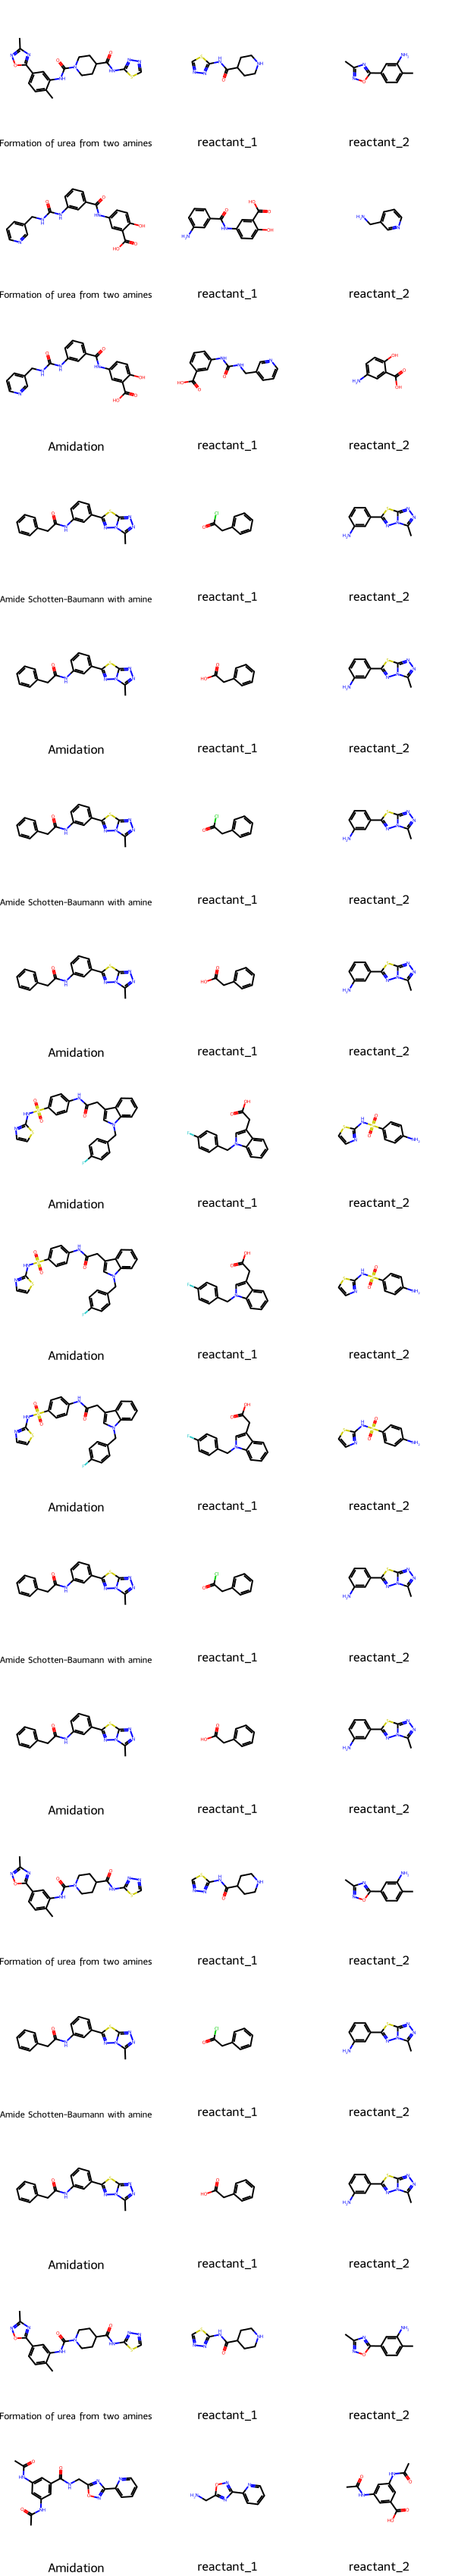

In [107]:
smiles_and_reactants = list()
caption = list()
for i, row in df.iterrows():
    smiles_and_reactants.append(row['SMILES'])
    smiles_and_reactants.append(ast.literal_eval(row['reactants'])[0][0])
    smiles_and_reactants.append(ast.literal_eval(row['reactants'])[0][1])
    caption.append(ast.literal_eval(row['rxn_order_first_to_last'])[0])
    caption.append('reactant_1')
    caption.append('reactant_2')
print(len(smiles_and_reactants))
draw_molecule_grid_with_captions(smiles_and_reactants, caption)

In [108]:
# Convert these into csv that pipeline can take in as input
process_routes(df, smiles_col_idx=0, reaction_name_col_idx=2, reactants_col_idx=3, results_dir="/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r", output_filename="1_step_to_elaborate.csv")

Processed data saved at: /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r/1_step_to_elaborate.csv


In [109]:
# RUN this command in terminal:
# python main_v2.py -i /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r/1_step_to_elaborate.csv -r /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r -u

# AUGUST 22 COMPOUNDS TO SEND TO MATTEO

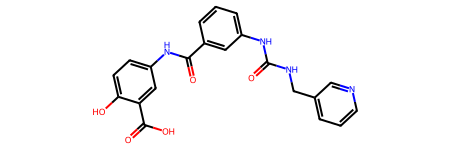

In [110]:
# Looking at elaborated compounds for this
mol = Chem.MolFromSmiles('O=C(NCc1cccnc1)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1')
mol


In [111]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/d2r/Formation_of_urea_from_two_amines_O=C(NCc1cccnc1)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1/Formation_of_urea_from_two_amines_78188_analogs.csv')
df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi
0,0.104314,334.259,COC(=O)c1cc(NC(=O)c2ccc(F)c([N+](=O)[O-])c2)ccc1O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",[0],0.230346,149.157,[N-]=[N+]=NCc1cnccc1N,"[{'catalogName': 'enamine_made', 'catalogId': ...",[0],COC(=O)c1cc([NH](C(=O)Nc2ccncc2CN=[N+]=[N-])C(...
1,0.109888,387.348,O=C(Nc1ccc(O)c(C(=O)O)c1)c1ccc(N2CCOCC2)c([N+]...,"[{'catalogName': 'pubchem', 'catalogId': '2867...",[0],0.230346,149.157,[N-]=[N+]=NCc1cnccc1N,"[{'catalogName': 'enamine_made', 'catalogId': ...",[0],[N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1ccc(N2CC...
2,0.114273,288.259,Nc1cc(C(=O)Nc2ccc(O)c(C(=O)O)c2)ccc1O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",[0],0.230346,149.157,[N-]=[N+]=NCc1cnccc1N,"[{'catalogName': 'enamine_made', 'catalogId': ...",[0],[N-]=[N+]=NCc1cnccc1NC(=O)Nc1cc(C(=O)Nc2ccc(O)...
3,0.114273,288.259,Nc1cc(C(=O)Nc2ccc(O)c(C(=O)O)c2)ccc1O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",[0],0.230346,149.157,[N-]=[N+]=NCc1cnccc1N,"[{'catalogName': 'enamine_made', 'catalogId': ...",[0],[N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1ccc(O)c(...
4,0.135864,350.714,COC(=O)c1cc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)ccc1O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",[0],0.230346,149.157,[N-]=[N+]=NCc1cnccc1N,"[{'catalogName': 'enamine_made', 'catalogId': ...",[0],COC(=O)c1cc([NH](C(=O)Nc2ccncc2CN=[N+]=[N-])C(...
...,...,...,...,...,...,...,...,...,...,...,...
78183,0.423315,385.420,CCCCCNC(=O)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",[0],0.837833,164.252,CC(C)(C)NCc1cccnc1,"[{'catalogName': 'mcule_ultimate', 'catalogId'...",[0],CCCCC[NH](C(=O)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)...
78184,0.423315,385.420,CCCCCNC(=O)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",[0],0.837833,164.252,CC(C)(C)NCc1cccnc1,"[{'catalogName': 'mcule_ultimate', 'catalogId'...",[0],CCCCCNC(=O)[NH](C(=O)[NH](Cc1cccnc1)C(C)(C)C)c...
78185,0.423315,385.420,CCCCCNC(=O)Nc1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",[0],0.837833,164.252,CC(C)(C)NCc1cccnc1,"[{'catalogName': 'mcule_ultimate', 'catalogId'...",[0],CCCCCNC(=O)Nc1cccc(C(=O)[NH](C(=O)[NH](Cc2cccn...
78186,0.469758,302.242,O=C(Nc1ccc(O)c(C(=O)O)c1)c1cccc([N+](=O)[O-])c1,"[{'catalogName': 'pubchem', 'catalogId': '7027...",[0],0.837833,164.252,CC(C)(C)NCc1cccnc1,"[{'catalogName': 'mcule_ultimate', 'catalogId'...",[0],CC(C)(C)[NH](Cc1cccnc1)C(=O)[NH](C(=O)c1cccc([...


In [112]:
# Find if original product is MCS and if so, find number of atoms different between MCS and elaborated
def is_mcs_same_as_mol(mol1, mol2, compare_mol):
    # Find the MCS of mol1 and mol2
    mcs_result = rdFMCS.FindMCS([mol1, mol2])

    # Create an RDKit molecule object from the MCS's SMARTS string
    mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)

    # Check if the MCS is the same as the compare_mol using a substructure match
    return compare_mol.HasSubstructMatch(mcs_mol) and mcs_mol.HasSubstructMatch(compare_mol)

def mcs_and_atom_difference(x, orig_product):
    print(x)
    elab_prod = Chem.MolFromSmiles(x)
    if elab_prod is None:
        print('This molecule should not exist:', x)
        return
    mcs = is_mcs_same_as_mol(orig_product, elab_prod, orig_product)
    print(mcs)

orig_product = mol
df['product_smi'].apply(lambda x: mcs_and_atom_difference(x, orig_product=orig_product))

COC(=O)c1cc([NH](C(=O)Nc2ccncc2CN=[N+]=[N-])C(=O)c2ccc(F)c([N+](=O)[O-])c2)ccc1O
This molecule should not exist: COC(=O)c1cc([NH](C(=O)Nc2ccncc2CN=[N+]=[N-])C(=O)c2ccc(F)c([N+](=O)[O-])c2)ccc1O
[N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1ccc(N2CCOCC2)c([N+](=O)[O-])c1)c1ccc(O)c(C(=O)O)c1
This molecule should not exist: [N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1ccc(N2CCOCC2)c([N+](=O)[O-])c1)c1ccc(O)c(C(=O)O)c1
[N-]=[N+]=NCc1cnccc1NC(=O)Nc1cc(C(=O)Nc2ccc(O)c(C(=O)O)c2)ccc1O
False
[N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1ccc(O)c(N)c1)c1ccc(O)c(C(=O)O)c1
This molecule should not exist: [N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1ccc(O)c(N)c1)c1ccc(O)c(C(=O)O)c1
COC(=O)c1cc([NH](C(=O)Nc2ccncc2CN=[N+]=[N-])C(=O)c2cc([N+](=O)[O-])ccc2Cl)ccc1O
This molecule should not exist: COC(=O)c1cc([NH](C(=O)Nc2ccncc2CN=[N+]=[N-])C(=O)c2cc([N+](=O)[O-])ccc2Cl)ccc1O
[N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1cccc([N+](=O)[O-])c1Cl)c1ccc(O)c(C(=O)O)c1
This molecule should not exist: [N-]=[N+]=NCc1cnccc1NC(=O)[NH](C(=O)c1cccc([N+]

[07:34:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 13 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 13 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 13 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 13 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 8 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 13 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 14 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[07:34:05] Explicit valence for atom # 7 N, 4

TypeError: No registered converter was able to produce a C++ rvalue of type std::__1::basic_string<wchar_t, std::__1::char_traits<wchar_t>, std::__1::allocator<wchar_t>> from this Python object of type float

In [ ]:
mol = Chem.MolFromSmiles('CCc1noc(-c2ccc(C)c(NC(=O)[NH](CC3CCCN3CCOC)C(=O)[NH](C(=O)C3CCN(C(C)=O)CC3)c3nncs3)c2)n1')
mol